# Gerekli Kütüphanelerin Yüklenmesi

In [2]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.metrics import roc_auc_score, plot_roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,Activation
import joblib

# Veri Setinin Yüklenmesi

In [3]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Veri Seti Hakkında Bilgiler

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
dataset.isnull().sum() #NA kontrolü

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Veri setinden problemi temsil etmeyen 'id' özniteliğinin çıkarılması

In [8]:
dataset = dataset.drop(['id'],axis=1)
dataset.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


# Makine Öğrenmesi Başlangıç

# Veri setindeki 'bmi' özniteliğinde bulunan 'NaN' değerlerin 'SimpleImputer' kullanılarak doldurulması 

In [9]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(dataset[['bmi']])
dataset['bmi'] = imputer.transform(dataset[['bmi']])

dataset.isnull().sum() #NaN değer kontrolü('bmi' özniteliği için)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Verilerin Görselleştirilmesi

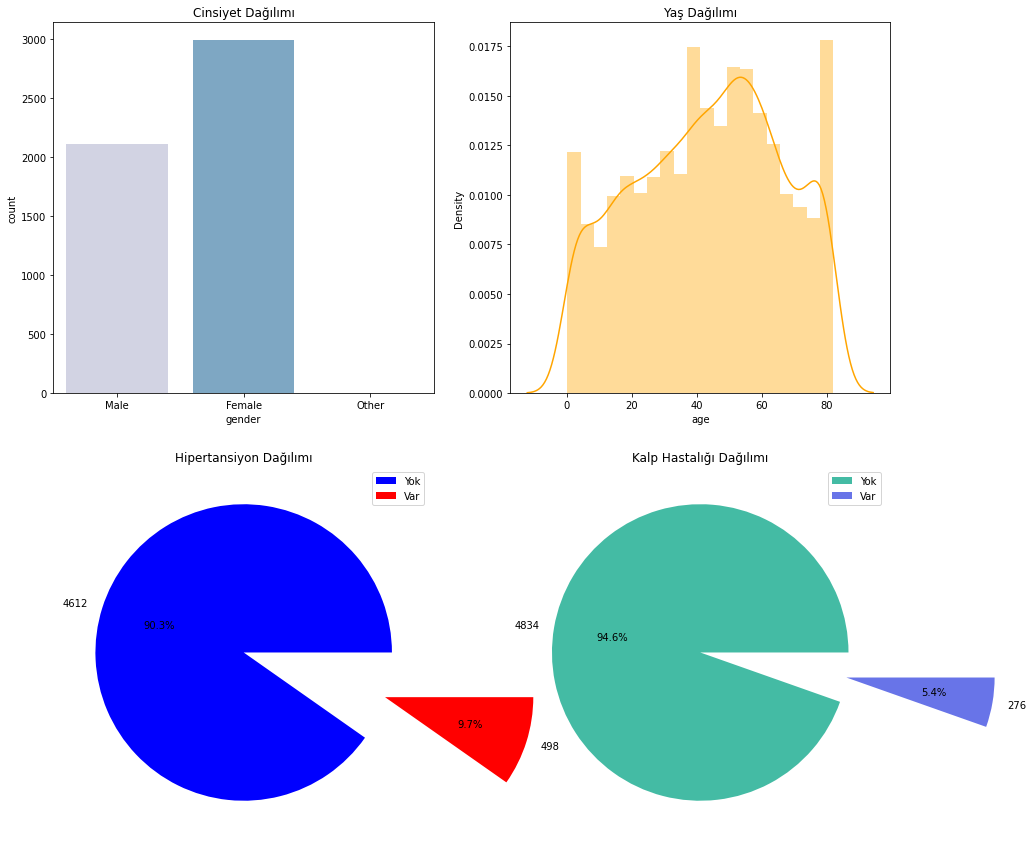

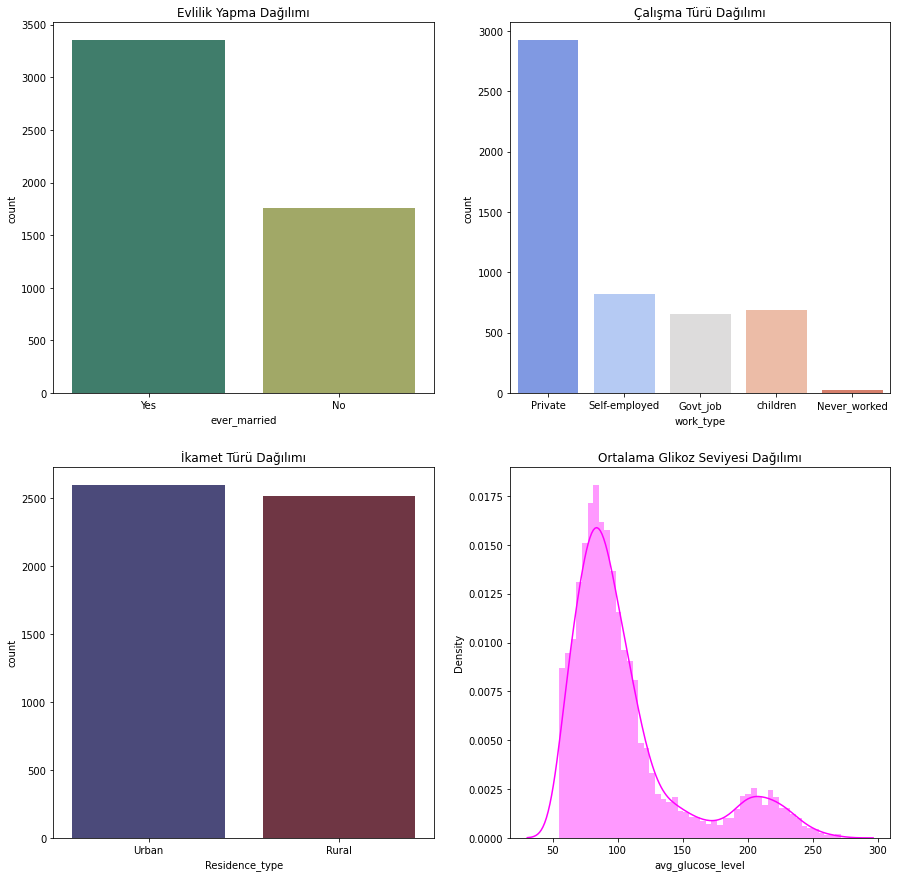

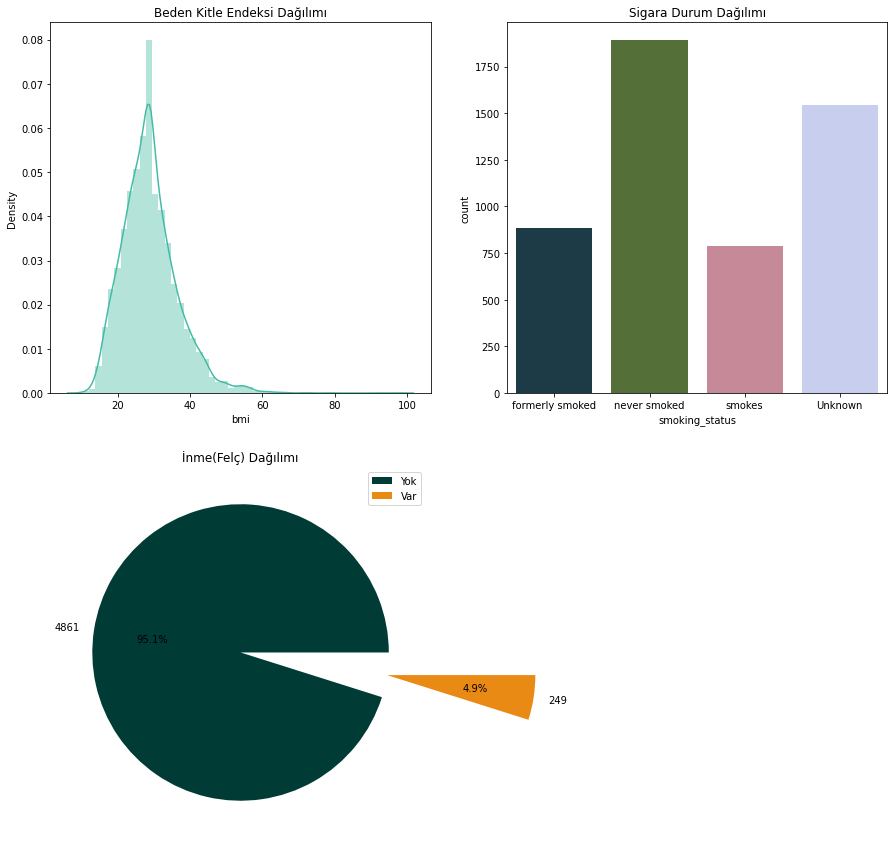

In [10]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(dataset["gender"],palette='PuBu')
plt.title("Cinsiyet Dağılımı")
#plt.legend()
plt.subplot(2,2,2)
sns.distplot(dataset["age"],color='orange')
plt.title("Yaş Dağılımı")
plt.subplot(2,2,3)
plt.pie(dataset["hypertension"].value_counts(),
      dataset["hypertension"].value_counts().index,
      dataset["hypertension"].value_counts().values,
      autopct = "%.1f%%",
      colors=['blue','red'],
      )
labels = ['Yok','Var']
plt.title("Hipertansiyon Dağılımı")
plt.legend(labels)
plt.subplot(2,2,4)
plt.pie(dataset["heart_disease"].value_counts(),
      dataset["heart_disease"].value_counts().index,
      dataset["heart_disease"].value_counts().values,
      autopct = "%.1f%%",
      colors=['#44BBA4','#6874E8'],
      )
labels = ['Yok','Var']
plt.title("Kalp Hastalığı Dağılımı")
plt.legend(labels)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(dataset["ever_married"],palette='gist_earth')
plt.title("Evlilik Yapma Dağılımı")
plt.subplot(2,2,2)
sns.countplot(dataset["work_type"],palette='coolwarm')
plt.title("Çalışma Türü Dağılımı")
plt.subplot(2,2,3)
sns.countplot(dataset["Residence_type"],palette='icefire')
plt.title("İkamet Türü Dağılımı")
plt.subplot(2,2,4)
sns.distplot(dataset["avg_glucose_level"],color='magenta')
plt.title("Ortalama Glikoz Seviyesi Dağılımı")

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.distplot(dataset["bmi"],color='#44BBA4')
plt.title("Beden Kitle Endeksi Dağılımı")
plt.subplot(2,2,2)
sns.countplot(dataset["smoking_status"],palette='cubehelix')
plt.title("Sigara Durum Dağılımı")
plt.subplot(2,2,3)
plt.pie(dataset["stroke"].value_counts(),
      dataset["stroke"].value_counts().index,
      dataset["stroke"].value_counts().values,
      autopct = "%.1f%%",
      colors=['#003B36','#E98A15'],
      )
labels = ['Yok','Var']
plt.title("İnme(Felç) Dağılımı")
plt.legend(labels)

<AxesSubplot:xlabel='stroke', ylabel='age'>

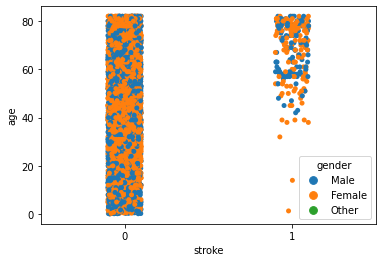

In [11]:
sns.stripplot(x='stroke',y='age',hue='gender',data=dataset)

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

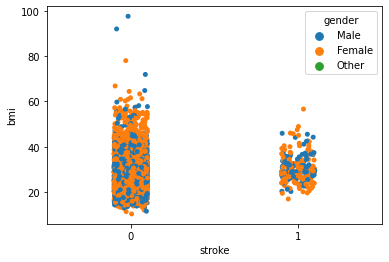

In [12]:
sns.stripplot(x='stroke',y='bmi',hue='gender',data=dataset)

<AxesSubplot:xlabel='stroke', ylabel='age'>

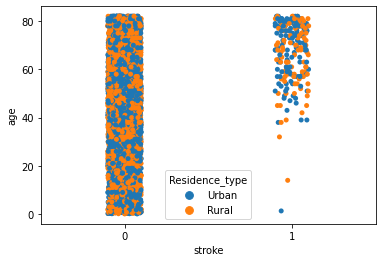

In [13]:
sns.stripplot(x='stroke',y='age',hue='Residence_type',data=dataset)

<AxesSubplot:xlabel='stroke', ylabel='age'>

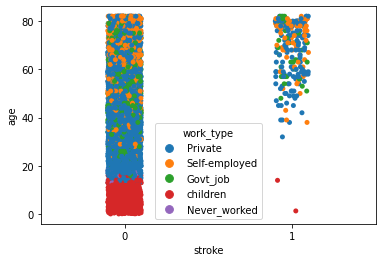

In [14]:
sns.stripplot(x='stroke',y='age',hue='work_type',data=dataset)

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

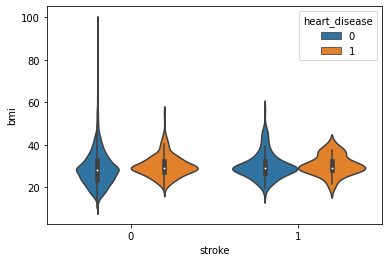

In [15]:
sns.violinplot(x='stroke',y='bmi',hue='heart_disease',data=dataset)

<AxesSubplot:xlabel='stroke', ylabel='age'>

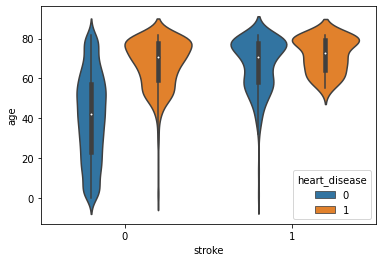

In [16]:
sns.violinplot(x='stroke',y='age',hue='heart_disease',data=dataset)

<AxesSubplot:xlabel='stroke', ylabel='age'>

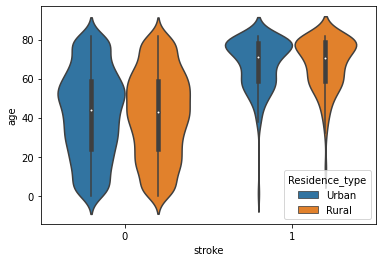

In [17]:
sns.violinplot(x='stroke',y='age',hue='Residence_type',data=dataset)

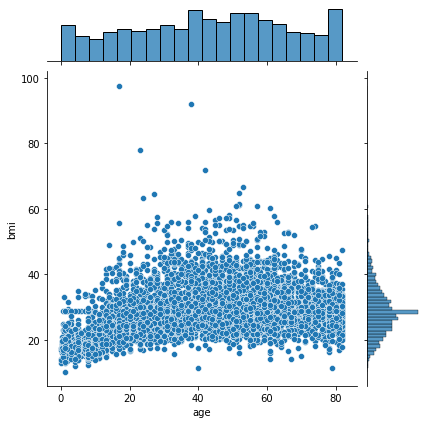

In [18]:
sns.jointplot(x='age',y='bmi',data=dataset)

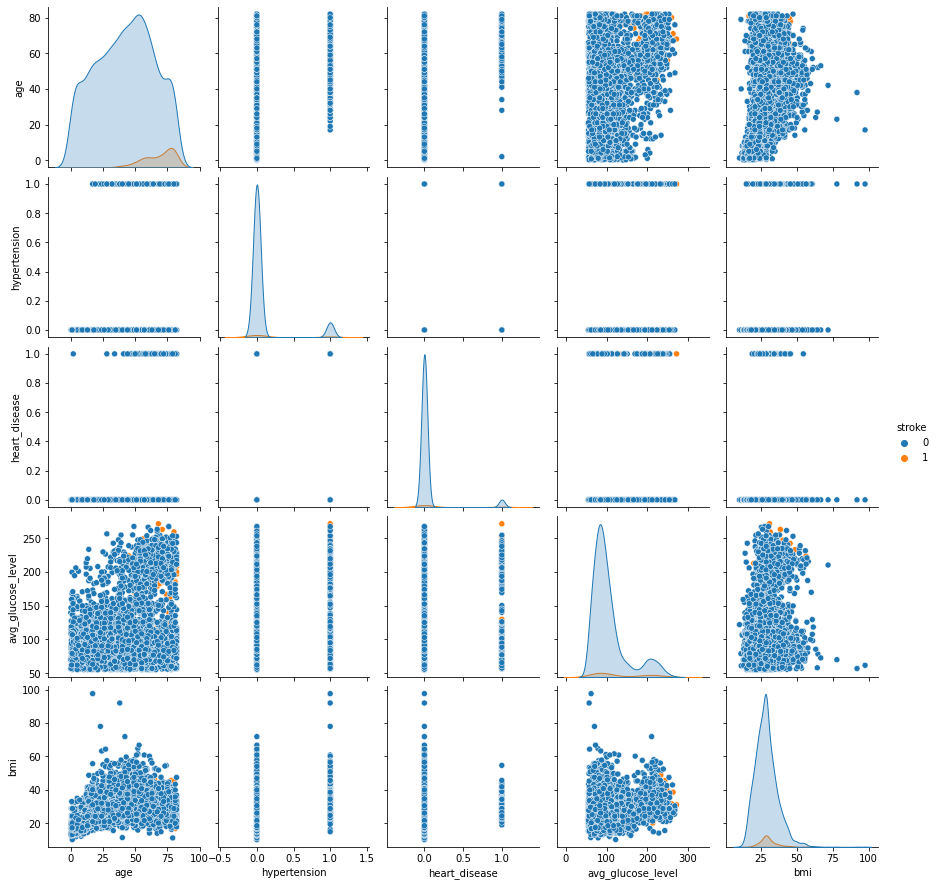

In [19]:
sns.pairplot(dataset,hue='stroke')

In [20]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Veri Setindeki Kategorik Özniteliklerin 'LabelEncoder' ile Sayısal Hale Getirilmesi

In [21]:
le = LabelEncoder()
labels_le = ['gender','ever_married','work_type','Residence_type','smoking_status']
for i in labels_le:
    dataset[i] = le.fit_transform(dataset[i])
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# Veri Setindeki Sayısal Özniteliklerin 'StandartScaler' ile Normalize Edilmesi

In [22]:
sc = StandardScaler()
labels_sc = ['age','avg_glucose_level','bmi']
for x in labels_sc:
    dataset[labels_sc] = sc.fit_transform(dataset[labels_sc])
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,2.706375,1.001234e+00,1,1
1,0,0.786070,0,0,1,3,0,2.121559,4.254025e-16,2,1
2,1,1.626390,0,1,1,2,0,-0.005028,4.685773e-01,2,1
3,0,0.255342,0,0,1,2,1,1.437358,7.154182e-01,3,1
4,0,1.582163,1,0,1,3,0,1.501184,-6.357112e-01,2,1


# Öznitelikler Arasındaki Uyumu Görebilmek Adına Korelasyona Bakılması

<AxesSubplot:>

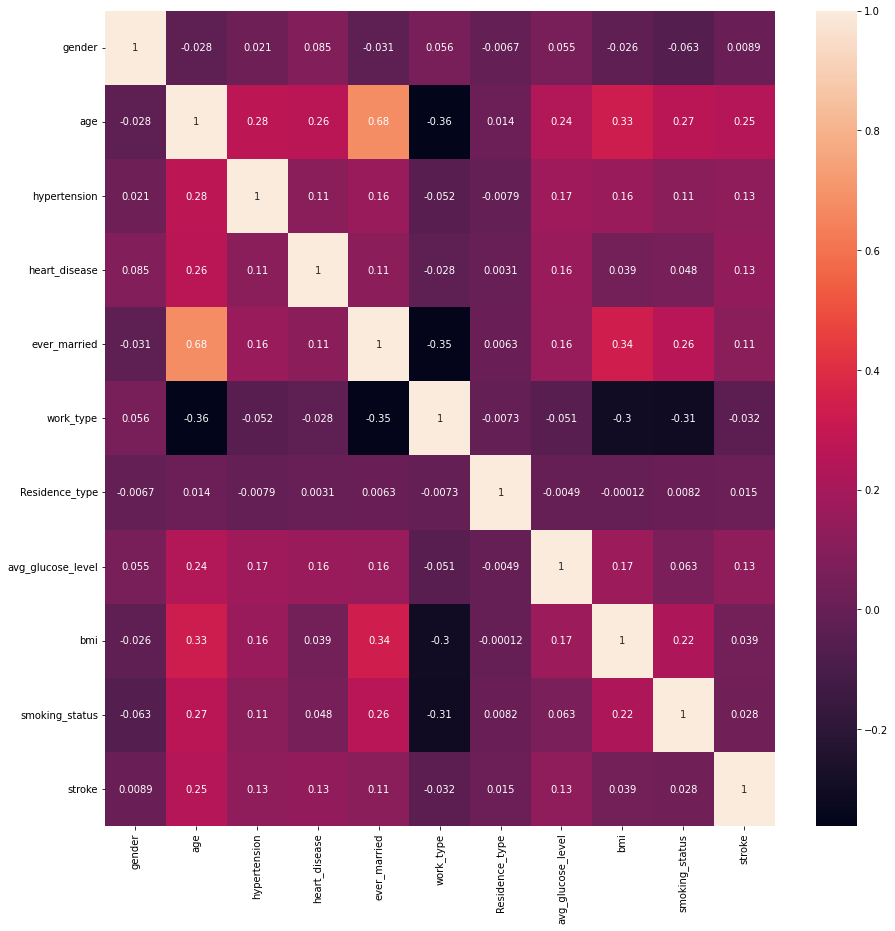

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True)

# Özniteliklerin Bağımlı ve Bağımsız Değişken Olarak Ayrılması

In [24]:
X = dataset.drop(['stroke'],axis=1)
Y = dataset['stroke']

## Bağımlı ve Bağımsız Değişkenlerin Şekilleri

In [25]:
X.shape

(5110, 10)

In [26]:
Y.shape

(5110,)

# Verilerin Makine Öğrenimi İçin Eğitim ve Test Olarak Ayrılması

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42,)

In [28]:
X_train.shape

(3577, 10)

In [29]:
Y_train.shape

(3577,)

In [30]:
X_test.shape

(1533, 10)

In [31]:
Y_test.shape

(1533,)

# Makine Öğrenmesi Algoritmaların Seçilip Cross-Validation(Çapraz Doğrulama) Yöntemi Kullanılarak En Yüksek Başarımı Veren Algoritmanın Belirlenmesi

In [32]:

models = [
    ('LR',LogisticRegression()),
    ('NB',GaussianNB()),
    ('KNN',KNeighborsClassifier(n_neighbors=3)),
    ('ABC',AdaBoostClassifier()),
    ('BC',BaggingClassifier()),
    ('ETC',ExtraTreesClassifier()),
    ('GBC',GradientBoostingClassifier()),
    ('RFC',RandomForestClassifier()),
    ('DTC',DecisionTreeClassifier()),
    ('SVM',SVC()),
    ('MLP',MLPClassifier(activation='relu',max_iter=200,shuffle=True,random_state=42)),
    ('XGBoost',XGBClassifier(eval_metric='mlogloss',use_label_encoder =False)),
    ('CatBoost',CatBoostClassifier(iterations=10,))
]
names = []
results = []
for name,model in models:
    kfold = KFold(n_splits=10,random_state=42)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    names.append(name)
    results.append(cv_results)
    print("Algoritma: %s / Başarım: %f / Std: %f" % (name,cv_results.mean(),cv_results.std()))

Algoritma: LR / Başarım: 0.955271 / Std: 0.014300
Algoritma: NB / Başarım: 0.870275 / Std: 0.015987
Algoritma: KNN / Başarım: 0.946046 / Std: 0.011588
Algoritma: ABC / Başarım: 0.953035 / Std: 0.014070
Algoritma: BC / Başarım: 0.950519 / Std: 0.012982
Algoritma: ETC / Başarım: 0.949116 / Std: 0.015102
Algoritma: GBC / Başarım: 0.952476 / Std: 0.014462
Algoritma: RFC / Başarım: 0.954992 / Std: 0.014378
Algoritma: DTC / Başarım: 0.922278 / Std: 0.014846
Algoritma: SVM / Başarım: 0.955271 / Std: 0.014300
Algoritma: MLP / Başarım: 0.953314 / Std: 0.015303
Algoritma: XGBoost / Başarım: 0.949401 / Std: 0.016067
Learning rate set to 0.5
0:	learn: 0.3869272	total: 148ms	remaining: 1.34s
1:	learn: 0.2669931	total: 149ms	remaining: 597ms
2:	learn: 0.2145399	total: 150ms	remaining: 351ms
3:	learn: 0.1849885	total: 152ms	remaining: 228ms
4:	learn: 0.1683934	total: 153ms	remaining: 153ms
5:	learn: 0.1558996	total: 154ms	remaining: 103ms
6:	learn: 0.1503530	total: 156ms	remaining: 66.8ms
7:	learn: 0

#  En Yüksek Başarım Oranına Sahip Algoritmanın Seçilerek Eğitilmesi ve Test Edilmesi

In [56]:
svm = SVC()
svm.fit(X_train,Y_train)
y_pred = svm.predict(X_test)

In [57]:
print("Başarım: ",accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
print(classification_report(y_pred,Y_test))
print("ROC-AUC Puanı: ",roc_auc_score(Y_test, y_pred))

Başarım:  0.8220774768597875
[[1088  150]
 [ 369 1310]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1238
           1       0.90      0.78      0.83      1679

    accuracy                           0.82      2917
   macro avg       0.82      0.83      0.82      2917
weighted avg       0.83      0.82      0.82      2917

ROC-AUC Puanı:  0.8220000752155395


<Figure size 720x720 with 0 Axes>

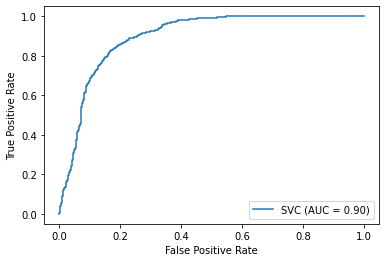

In [58]:
plt.figure(figsize=(10,10))
plot_roc_curve(svm,X_test,Y_test)

### Seçilen algoritmanın sonuçları değerlendirildiğinde veri setindeki dengesiz dağılım sonuca negatif yönde etki etmektedir. Görüldüğü üzere inme(felç) olmayanlar başarılı bir şekilde sınıflandırılırken bu hastalığa sahip olanlar neredeyse tespit edilememiştir. Bu nedenle 'Sampling' yöntemi kullanarak veri setini dengeleyip tekrardan eğitim ve test aşamalarını gerçekleştireceğiz.

# Smote Kullanılarak Veri Setinin Dengelenmesi

In [36]:
X = dataset.drop(['stroke'],axis=1)
Y = dataset['stroke']

In [37]:
smote = SMOTE()

X_oversample, Y_oversample = smote.fit_resample(X,Y)

print(Y.value_counts())
print(Y_oversample.value_counts())

0    4861
1     249
Name: stroke, dtype: int64
1    4861
0    4861
Name: stroke, dtype: int64


In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X_oversample,Y_oversample,random_state=42,test_size=0.3)

In [39]:

models = [
    ('LR',LogisticRegression()),
    ('NB',GaussianNB()),
    ('KNN',KNeighborsClassifier(n_neighbors=3)),
    ('ABC',AdaBoostClassifier()),
    ('BC',BaggingClassifier()),
    ('ETC',ExtraTreesClassifier()),
    ('GBC',GradientBoostingClassifier()),
    ('RFC',RandomForestClassifier()),
    ('DTC',DecisionTreeClassifier()),
    ('SVM',SVC()),
    ('MLP',MLPClassifier(activation='relu',max_iter=200,shuffle=True,random_state=42)),
    ('XGBoost',XGBClassifier(eval_metric='mlogloss',use_label_encoder =False)),
    ('CatBoost',CatBoostClassifier(iterations=10,random_state=42))
]
names = []
results = []
for name,model in models:
    kfold = KFold(n_splits=10,random_state=42)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    names.append(name)
    results.append(cv_results)
    print("Algoritma: %s / Başarım: %f / Std: %f" % (name,cv_results.mean(),cv_results.std()))

Algoritma: LR / Başarım: 0.779427 / Std: 0.009800
Algoritma: NB / Başarım: 0.744458 / Std: 0.015018
Algoritma: KNN / Başarım: 0.883467 / Std: 0.009463
Algoritma: ABC / Başarım: 0.810728 / Std: 0.012742
Algoritma: BC / Başarım: 0.920506 / Std: 0.010246
Algoritma: ETC / Başarım: 0.930201 / Std: 0.010189
Algoritma: GBC / Başarım: 0.855109 / Std: 0.010333
Algoritma: RFC / Başarım: 0.926820 / Std: 0.008057
Algoritma: DTC / Başarım: 0.886409 / Std: 0.019322
Algoritma: SVM / Başarım: 0.828658 / Std: 0.012583
Algoritma: MLP / Başarım: 0.853638 / Std: 0.007903
Algoritma: XGBoost / Başarım: 0.953122 / Std: 0.006256
Learning rate set to 0.5
0:	learn: 0.5498974	total: 1.99ms	remaining: 17.9ms
1:	learn: 0.4870047	total: 3.94ms	remaining: 15.8ms
2:	learn: 0.4566723	total: 5.92ms	remaining: 13.8ms
3:	learn: 0.4345908	total: 7.87ms	remaining: 11.8ms
4:	learn: 0.4183270	total: 9.8ms	remaining: 9.8ms
5:	learn: 0.4030457	total: 11.7ms	remaining: 7.78ms
6:	learn: 0.3936414	total: 13.6ms	remaining: 5.81ms


In [40]:
xgb = XGBClassifier(eval_metric='mlogloss',use_label_encoder =False)
xgb.fit(X_train,Y_train)
y_pred = xgb.predict(X_test)

In [41]:
print("Başarım: ",accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
print(classification_report(y_pred,Y_test))
print("ROC-AUC Puanı: ",roc_auc_score(Y_test, y_pred))

Başarım:  0.9557764826876929
[[1399   71]
 [  58 1389]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1470
           1       0.95      0.96      0.96      1447

    accuracy                           0.96      2917
   macro avg       0.96      0.96      0.96      2917
weighted avg       0.96      0.96      0.96      2917

ROC-AUC Puanı:  0.9557810193585995


<Figure size 720x720 with 0 Axes>

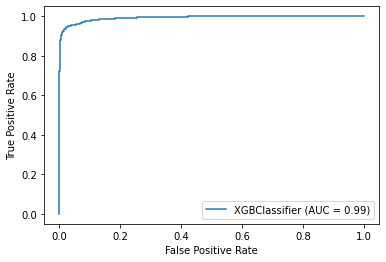

In [42]:
plt.figure(figsize=(10,10))
plot_roc_curve(xgb,X_test,Y_test)

# Makine Öğrenmesi Sonu

# Yapay Sinir Ağı Başlangıç

## Yapay Sinir Ağı İçin Bağımlı ve Bağımsız Değişkenlerin Yeniden Ayrılması(Sampling Olmadan)

In [43]:
X = dataset.drop(['stroke'],axis=1)
Y = dataset['stroke']

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

## Ağ Mimarisinin Kurulması 

In [45]:
model = Sequential()

model.add(Dense(64,input_dim=10,activation='relu'))
model.add(Dense(128))
model.add(Dropout(.3))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(Dense(128))
model.add(Dropout(.4))
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

## Modelin Derlenmesi

In [46]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['acc'])

## Modelin Eğitilmesi

In [47]:
history = model.fit(X_train,Y_train,epochs=100,batch_size=128,shuffle=True,validation_data=(X_test,Y_test))

Epoch 1/100
28/28 [==============================] - 2s 31ms/step - loss: 0.7932 - acc: 0.5349 - val_loss: 0.5439 - val_acc: 0.9419
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6516 - acc: 0.6493 - val_loss: 0.4539 - val_acc: 0.9419
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5580 - acc: 0.7375 - val_loss: 0.3888 - val_acc: 0.9419
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4673 - acc: 0.8056 - val_loss: 0.3427 - val_acc: 0.9419
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4305 - acc: 0.8405 - val_loss: 0.3127 - val_acc: 0.9419
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3749 - acc: 0.8744 - val_loss: 0.2893 - val_acc: 0.9419
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3514 - acc: 0.8848 - val_loss: 0.2729 - val_acc: 0.9419
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3183 - 

## Modelin Değerlendirilmesi, Eğitim ve Test Başarım ile Kayıp Oranlarının Grafiğe Dökülmesi

12/12 [==============================] - 0s 637us/step - loss: 0.1829 - acc: 0.9419


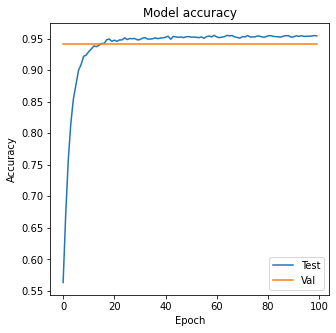

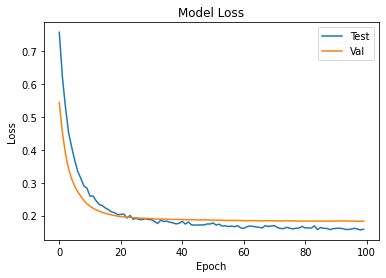

In [48]:
model.evaluate(X_test,Y_test,batch_size=128)

plt.figure(figsize=(5,5))


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Val'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Val'], loc='upper right')

plt.show()

## Yapay Sinir Ağının Veri Dengelenmesi İşlemi İle(Sampling) Yeniden Eğitilip Test Edilmesi

In [49]:
X = dataset.drop(['stroke'],axis=1)
Y = dataset['stroke']

In [50]:
smote = SMOTE()

X_oversample, Y_oversample = smote.fit_resample(X,Y)

print(Y.value_counts())
print(Y_oversample.value_counts())

0    4861
1     249
Name: stroke, dtype: int64
1    4861
0    4861
Name: stroke, dtype: int64


In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X_oversample,Y_oversample,random_state=42,test_size=0.3)

In [52]:
model = Sequential()

model.add(Dense(64,input_dim=10,activation='relu'))
model.add(Dense(128))
model.add(Dropout(.3))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(Dense(128))
model.add(Dropout(.4))
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [53]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['acc'])

In [54]:
history = model.fit(X_train,Y_train,epochs=100,batch_size=128,shuffle=True,validation_data=(X_test,Y_test))

Epoch 1/100
54/54 [==============================] - 1s 4ms/step - loss: 0.7510 - acc: 0.5869 - val_loss: 0.5783 - val_acc: 0.7662
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5647 - acc: 0.7248 - val_loss: 0.5258 - val_acc: 0.7823
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5500 - acc: 0.7459 - val_loss: 0.4913 - val_acc: 0.7926
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5142 - acc: 0.7561 - val_loss: 0.4707 - val_acc: 0.7888
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5183 - acc: 0.7626 - val_loss: 0.4583 - val_acc: 0.7964
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5083 - acc: 0.7610 - val_loss: 0.4479 - val_acc: 0.7964
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4935 - acc: 0.7709 - val_loss: 0.4408 - val_acc: 0.7998
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4864 - a

46/46 [==============================] - 0s 423us/step - loss: 0.3683 - acc: 0.8396


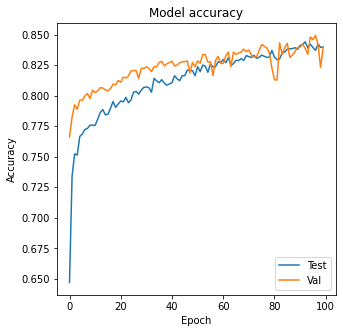

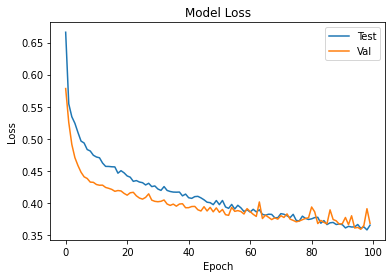

In [55]:
model.evaluate(X_test,Y_test,batch_size=64)

plt.figure(figsize=(5,5))


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Val'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Val'], loc='upper right')

plt.show()

# Yapay Sinir Ağı Sonu

# En Yüksek Başarımı Veren Makine Öğrenmesi Algoritmasının Model Olarak Kaydedilmesi

In [60]:
#Modelin Kaydedilmesi
joblib.dump(xgb,'model/xgb_model.pkl')

['model/xgb_model.pkl']